# Factor Analysis

## Praktikum

In [1]:
import pandas as pd
prak = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/praktikum.csv")
prak.head(5)

,A1,A2,A3,A4,A5,A6,A7,B1,B2,B3,...,B8,C1,C2,D1,D2,D3,D4,D5,D6,D7
0,3,3,3,3,3,2,1,2,2,2,...,3,3,3,3,3,3,2,3,2,2
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,2,3,4,4,4,...,4,4,2,4,4,4,4,4,4,4


### Uji Bartlett

In [2]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(prak)
chi_square_value, p_value

(48599.80298427729, 0.0)

### Uji KMO

In [3]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(prak)
kmo_model

C:\Users\ASUS VIVOBOOK\anaconda3\envs\home\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7660641189349261

### Menentukan Banyak Faktor

In [4]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(prak)  

ev, v = fa.get_eigenvalues()
ev

array([3.10907556, 3.05636826, 2.576868  , 1.35889743, 1.27812485,
       1.21836321, 0.98486807, 0.9203957 , 0.87357868, 0.79939706,
       0.75334171, 0.73536782, 0.68338503, 0.67301095, 0.64229566,
       0.59936859, 0.59683253, 0.54792177, 0.54473548, 0.51246691,
       0.44268868, 0.41005544, 0.3715841 , 0.31100852])

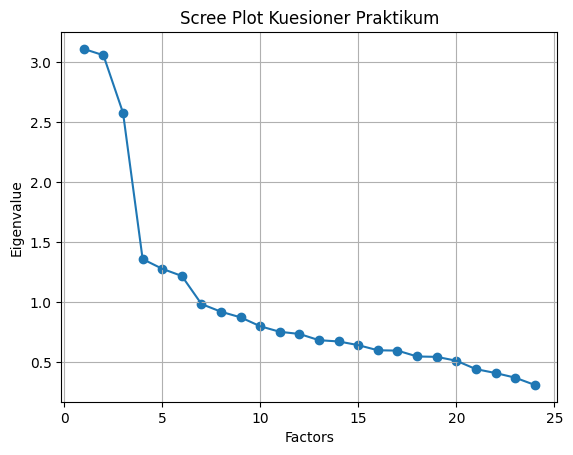

In [5]:
plt.scatter(range(1,prak.shape[1]+1),ev)
plt.plot(range(1,prak.shape[1]+1),ev)
plt.title('Scree Plot Kuesioner Praktikum')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Analisis Faktor

In [6]:
import numpy as np

fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(prak)

factor_loadings = fa.loadings_
eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=prak.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1         2         3
A1  0.010327  0.012686  0.573039 -0.043810
A2  0.000450 -0.000809  0.628010 -0.049334
A3  0.015875  0.015454  0.609457 -0.034368
A4 -0.004802  0.006315  0.448152 -0.003045
A5  0.001380 -0.007337  0.476292  0.016630
A6 -0.001794  0.004649  0.453606  0.002109
A7 -0.003601  0.019748  0.385981 -0.000618
B1  0.000190  0.332100  0.015043  0.198455
B2 -0.002018  0.457975  0.023503  0.106455
B3 -0.001916  0.701029  0.019511  0.029252
B4  0.001211  0.783539  0.006799  0.010364
B5 -0.006475  0.494806  0.007964  0.195141
B6 -0.008066  0.369827  0.021070  0.369252
B7 -0.024423  0.237477  0.053899  0.805827
B8 -0.025269  0.291106  0.045627  0.744320
C1 -0.011848 -0.001544  0.018600 -0.027091
C2 -0.002679 -0.029190  0.023192 -0.031245
D1  0.505659 -0.000924  0.007656  0.017040
D2  0.545720 -0.003090  0.010675  0.006721
D3  0.624856 -0.005736  0.004159  0.009362
D4  0.619346 -0.005769  0.002186  0.019209
D5  0.602427 -0.015937 -0.005683  0.0

In [7]:
faktor1 = []
faktor2 = []
faktor3 = []
faktor4 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    elif max(x) == x[1]:
        faktor2.append("X"+str(i+1))
    elif max(x) == x[2]:
        faktor3.append("X"+str(i+1))
    else:
        faktor4.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")
print(f"Faktor 3: {faktor3}")
print(f"Faktor 4: {faktor4}")

Faktor 1: ['X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24']
Faktor 2: ['X8', 'X9', 'X10', 'X11', 'X12', 'X13']
Faktor 3: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X16', 'X17']
Faktor 4: ['X14', 'X15']


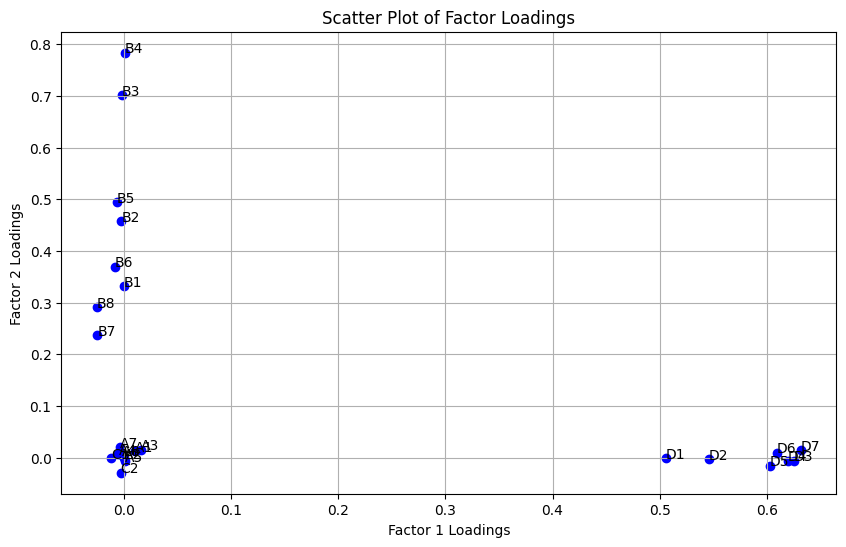

In [8]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

for i, txt in enumerate(prak.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

## Teori

In [9]:
import pandas as pd
teori = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/pbm_teori_2022_genap_edited.csv")
teori.head(5)

,A1,A10,A2,A3,A4,A5,A6,A7,A8,A9,...,B2,B3,B4,B5,B6,B7,B8,C1,C2,C3
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,4,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,3,4,3,3,4,4,4,4,...,4,4,4,3,4,4,4,3,4,4


### Uji Bartlett

In [10]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(teori)
chi_square_value, p_value

(204048.09767892386, 0.0)

### Uji KMO

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(teori)
kmo_model

C:\Users\ASUS VIVOBOOK\anaconda3\envs\home\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9816433399688205

### Menentukan Banyak faktor

In [12]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(teori)  

ev, v = fa.get_eigenvalues()
ev

array([13.61881818,  1.09269761,  0.65568062,  0.64403578,  0.5416624 ,
        0.43188826,  0.41615499,  0.34110031,  0.32021235,  0.29860975,
        0.29399727,  0.28798413,  0.27495368,  0.25968985,  0.24685736,
        0.24167063,  0.22378981,  0.21990431,  0.21510164,  0.19052489,
        0.18466616])

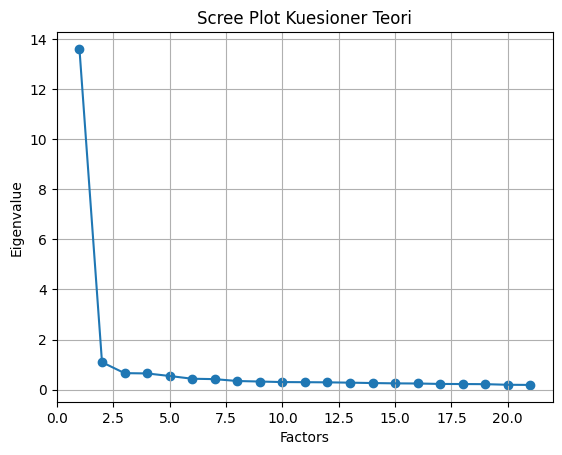

In [13]:
plt.scatter(range(1,teori.shape[1]+1),ev)
plt.plot(range(1,teori.shape[1]+1),ev)
plt.title('Scree Plot Kuesioner Teori')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Analisis Faktor

In [14]:
import numpy as np

fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(teori)

factor_loadings = fa.loadings_
eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=teori.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
            0         1         2
A1   0.644530  0.379341  0.211902
A10  0.646467  0.355596  0.249753
A2   0.651175  0.399663  0.181882
A3   0.640132  0.378391  0.199146
A4   0.644265  0.355403  0.213489
A5   0.640807  0.346621  0.260249
A6   0.663641  0.317332  0.261983
A7   0.647682  0.319680  0.280995
A8   0.638553  0.313466  0.286493
A9   0.637152  0.317215  0.283650
B1   0.435034  0.683999  0.317258
B2   0.438088  0.674281  0.325336
B3   0.445421  0.676825  0.312550
B4   0.440195  0.676995  0.318529
B5   0.441232  0.670387  0.320189
B6   0.435281  0.679439  0.317809
B7   0.447132  0.668401  0.315754
B8   0.428839  0.683394  0.315626
C1   0.356674  0.510399  0.640945
C2   0.396069  0.451523  0.667077
C3   0.390099  0.504375  0.633330

Eigenvalues:
[13.61881818  1.09269761  0.65568062  0.64403578  0.5416624   0.43188826
  0.41615499  0.34110031  0.32021235  0.29860975  0.29399727  0.28798413
  0.27495368  0.25968985  0.24685736  0.24167063  0.22378981  0.21990431
  

In [15]:
faktor1 = []
faktor2 = []
faktor3 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    elif max(x) == x[1]:
        faktor2.append("X"+str(i+1))
    else:
        faktor3.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")
print(f"Faktor 3: {faktor3}")

Faktor 1: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
Faktor 2: ['X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
Faktor 3: ['X19', 'X20', 'X21']


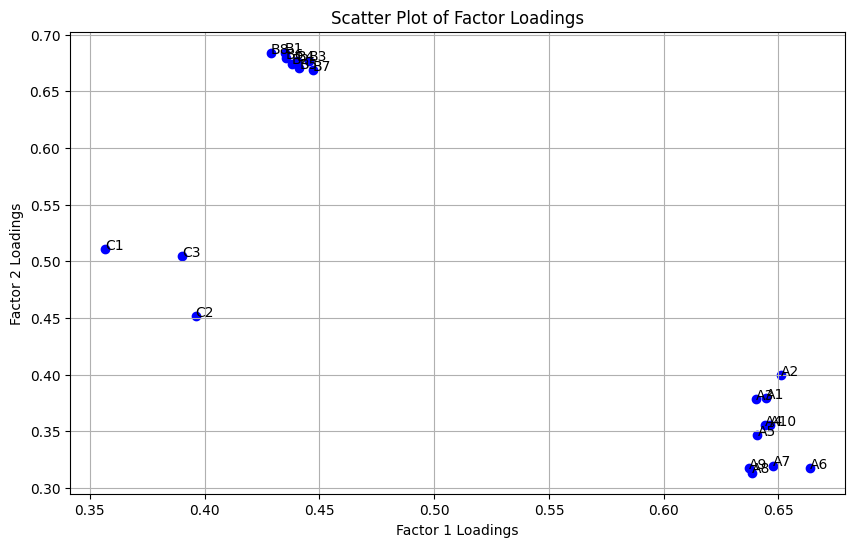

In [16]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

for i, txt in enumerate(teori.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

### Instrumen B Praktikum

In [17]:
import pandas as pd
b_prak = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/instrumen_b_prak (1).csv")
b_prak.head(5)

,B1,B2,B3,B4,B5,B6,C1,C2
0,2,2,2,2,3,3,3,3
1,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,2


In [18]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(b_prak)  

ev, v = fa.get_eigenvalues()
ev

array([2.49553506, 1.35537668, 0.89616933, 0.83692157, 0.74324409,
       0.64369743, 0.6180822 , 0.41097365])

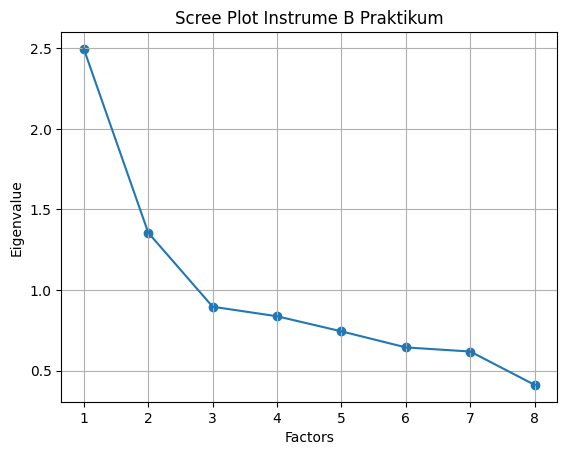

In [19]:
plt.scatter(range(1,b_prak.shape[1]+1),ev)
plt.plot(range(1,b_prak.shape[1]+1),ev)
plt.title('Scree Plot Instrume B Praktikum')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [20]:
import numpy as np

fa = FactorAnalyzer(n_factors=3, rotation='varimax')

fa.fit(b_prak)
factor_loadings = fa.loadings_

eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=b_prak.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1         2
B1  0.297925  0.199608 -0.011508
B2  0.389485  0.260787 -0.027414
B3  0.723197  0.156008 -0.007137
B4  0.749384  0.218854  0.006441
B5  0.343745  0.503338 -0.004780
B6  0.188562  0.590362 -0.010241
C1  0.003939  0.002374  0.530353
C2 -0.020600 -0.019789  0.671550

Eigenvalues:
[2.49553506 1.35537668 0.89616933 0.83692157 0.74324409 0.64369743
 0.6180822  0.41097365]

Communalities:
[ 1.93442157e+00  7.32174037e-01  3.28331092e-01  4.94320090e-02
  1.77684141e-02 -6.43265352e-04 -1.99420588e-02 -4.66184171e-02]


In [21]:
faktor1 = []
faktor2 = []
faktor3 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    elif max(x) == x[1]:
        faktor2.append("X"+str(i+1))
    else:
        faktor3.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")
print(f"Faktor 3: {faktor3}")

Faktor 1: ['X1', 'X2', 'X3', 'X4']
Faktor 2: ['X5', 'X6']
Faktor 3: ['X7', 'X8']


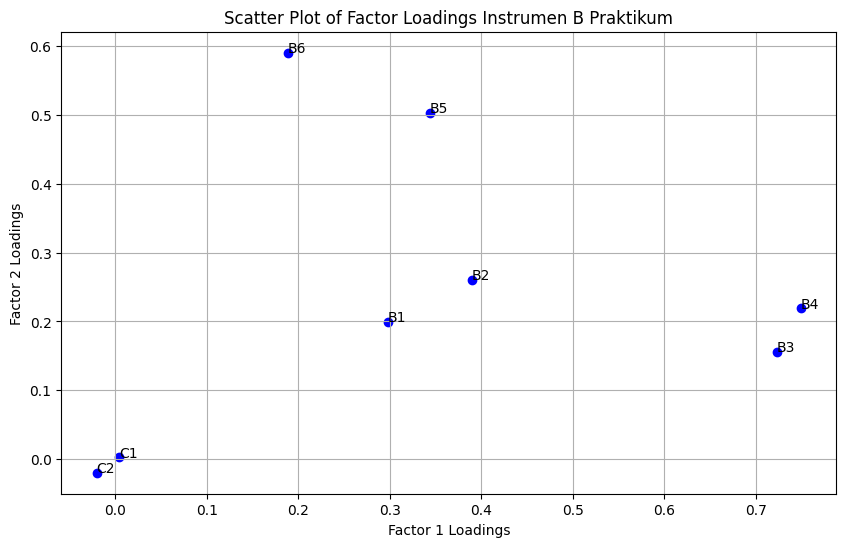

In [22]:
import matplotlib.pyplot as plt

# Ambil faktor loadings
factor_loadings = fa.loadings_

# Buat scatter plot faktor loadings
plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings Instrumen B Praktikum')
plt.grid(True)

# Tambahkan label untuk setiap titik
for i, txt in enumerate(b_prak.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

### Instrumen B Praktikum 1000 data

In [23]:
import pandas as pd
ins_b_prak = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/instrumen_b_prak_1000.csv")
ins_b_prak.head(5)

,B1,B2,B3,B4,B5,B6,C1,C2
0,2,2,2,2,3,3,3,3
1,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,2


In [24]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(ins_b_prak)  

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.6505631 , 1.15925893, 1.00772901, 0.85613294, 0.80212258,
       0.65768734, 0.52627642, 0.34022967])

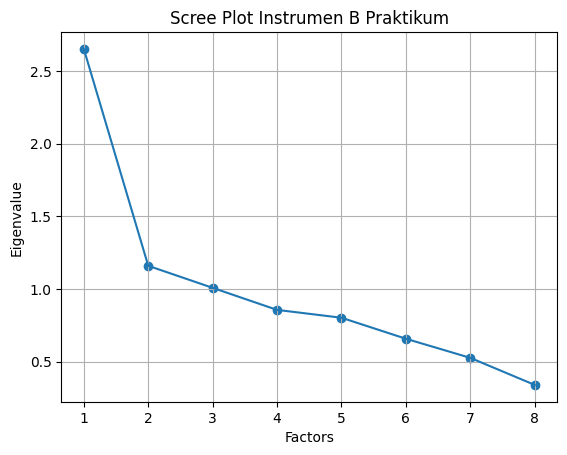

In [25]:
plt.scatter(range(1,ins_b_prak.shape[1]+1),ev)
plt.plot(range(1,ins_b_prak.shape[1]+1),ev)
plt.title('Scree Plot Instrumen B Praktikum')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [26]:
import numpy as np

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(ins_b_prak)

factor_loadings = fa.loadings_
eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=ins_b_prak.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1
B1  0.402191  0.415869
B2  0.041908  0.948331
B3  0.737663  0.263772
B4  0.650220  0.408487
B5  0.293048  0.077563
B6  0.544497  0.140889
C1  0.028569  0.007391
C2  0.014347 -0.004982

Eigenvalues:
[2.6505631  1.15925893 1.00772901 0.85613294 0.80212258 0.65768734
 0.52627642 0.34022967]

Communalities:
[ 2.19622438  0.65226075  0.16708581  0.13686362  0.03918377 -0.06077917
 -0.10394503 -0.17840909]


In [27]:
faktor1 = []
faktor2 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    else:
        faktor2.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")

Faktor 1: ['X3', 'X4', 'X5', 'X6', 'X7', 'X8']
Faktor 2: ['X1', 'X2']


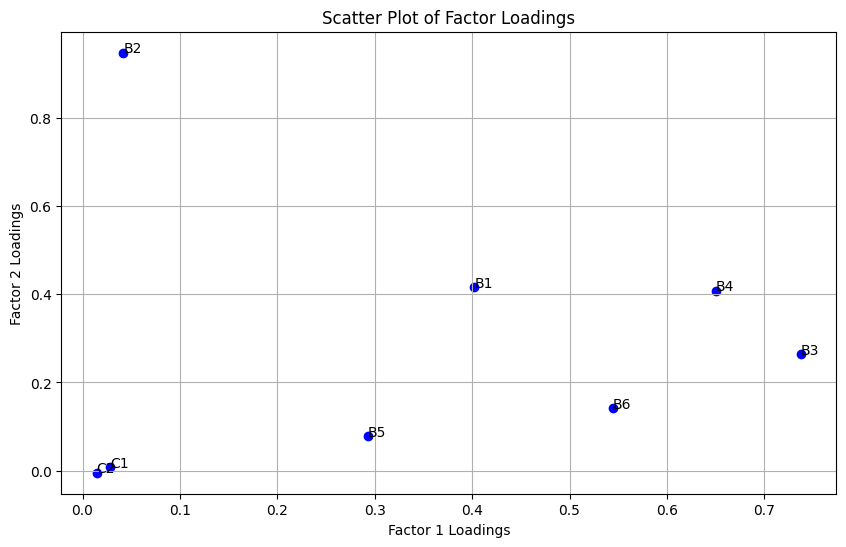

In [28]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

for i, txt in enumerate(ins_b_prak.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

### instrumen D praktikum

In [29]:
import pandas as pd
d_prak = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/instrumen_d_prak.csv")
d_prak.head(5)

,D1,D2,D3,D4,D5,D6,D7
0,3,3,3,2,3,2,2
1,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4


In [30]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(d_prak)  

ev, v = fa.get_eigenvalues()
ev

array([3.10354651, 0.98375499, 0.79650063, 0.67773128, 0.55316552,
       0.51316507, 0.372136  ])

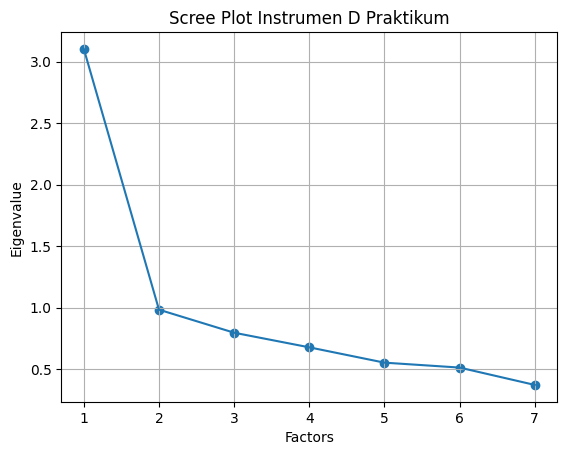

In [31]:
plt.scatter(range(1,d_prak.shape[1]+1),ev)
plt.plot(range(1,d_prak.shape[1]+1),ev)
plt.title('Scree Plot Instrumen D Praktikum')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [32]:
import numpy as np

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(d_prak)

factor_loadings = fa.loadings_
eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=d_prak.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1
D1  0.459260  0.215962
D2  0.528076  0.194168
D3  0.706211  0.133070
D4  0.611800  0.210253
D5  0.527345  0.275626
D6  0.205550  0.912298
D7  0.343502  0.599323

Eigenvalues:
[3.10354651 0.98375499 0.79650063 0.67773128 0.55316552 0.51316507
 0.372136  ]

Communalities:
[ 2.58978958e+00  6.25069182e-01  1.36060210e-01  1.02275837e-02
  2.02283770e-03 -6.24230813e-02 -8.58890009e-02]


In [33]:
faktor1 = []
faktor2 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    else:
        faktor2.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")

Faktor 1: ['X1', 'X2', 'X3', 'X4', 'X5']
Faktor 2: ['X6', 'X7']


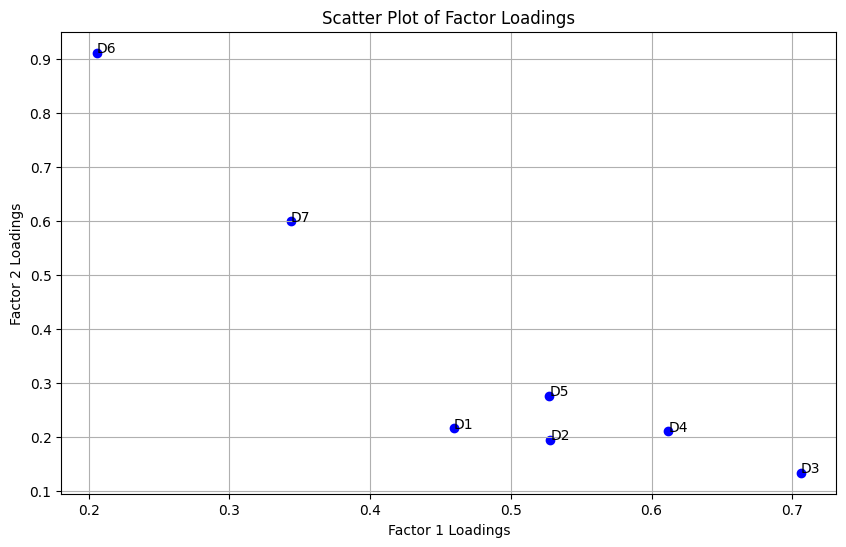

In [34]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

for i, txt in enumerate(d_prak.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

### Instrumen D Praktikum 1000 Data

In [35]:
import pandas as pd
ins_d_prak = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/instrumen_d_prak_1000.csv")
ins_d_prak.head(5)

,D1,D2,D3,D4,D5,D6,D7
0,3,3,3,2,3,2,2
1,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4


In [36]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(ins_d_prak)  

ev, v = fa.get_eigenvalues()
ev

array([3.78912203, 1.04767191, 0.82149515, 0.55256993, 0.3294222 ,
       0.26970993, 0.19000885])

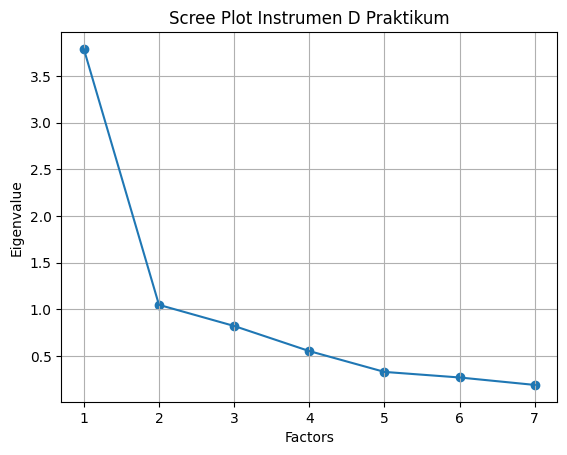

In [37]:
plt.scatter(range(1,ins_d_prak.shape[1]+1),ev)
plt.plot(range(1,ins_d_prak.shape[1]+1),ev)
plt.title('Scree Plot Instrumen D Praktikum')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [38]:
import numpy as np

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(ins_d_prak)

factor_loadings = fa.loadings_

eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=ins_d_prak.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1
D1  0.282195  0.613096
D2  0.471514  0.416086
D3  0.156196  0.777787
D4  0.663064  0.419666
D5  0.880703  0.251989
D6  0.860387  0.220682
D7  0.266957  0.552427

Eigenvalues:
[3.78912203 1.04767191 0.82149515 0.55256993 0.3294222  0.26970993
 0.19000885]

Communalities:
[ 3.41264108e+00  6.87998485e-01  2.85540139e-01  2.97412289e-02
  3.77507152e-04 -9.30900473e-02 -2.22567853e-01]


In [39]:
faktor1 = []
faktor2 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    else:
        faktor2.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")

Faktor 1: ['X2', 'X4', 'X5', 'X6']
Faktor 2: ['X1', 'X3', 'X7']


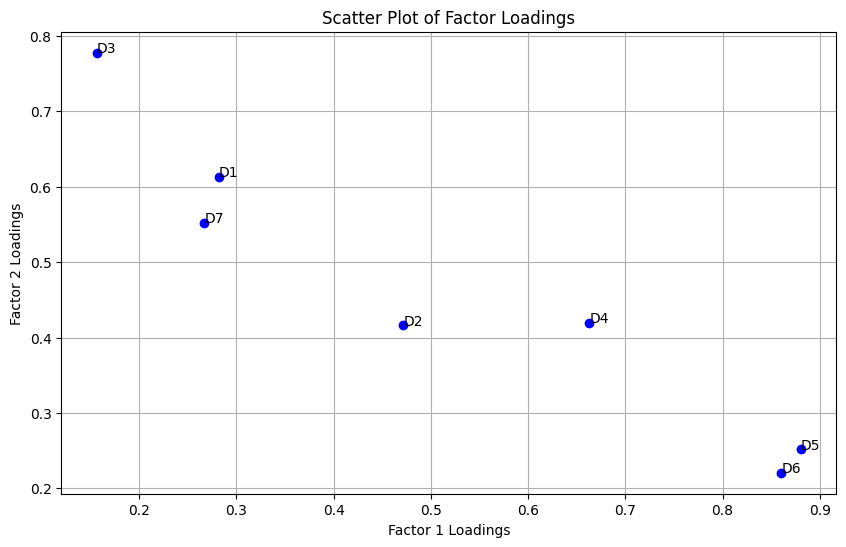

In [40]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

for i, txt in enumerate(ins_d_prak.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

### Instrumen B Teori

In [41]:
import pandas as pd
b_teori = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/instrumen_b_teori.csv")
b_teori.head(5)

,B1,B2,B3,B4,B5,B6,B7,B8
0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,2.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0
3,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0


In [42]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(b_teori)  

ev, v = fa.get_eigenvalues()
ev

array([6.26694518, 0.2931089 , 0.28911111, 0.24774884, 0.24215859,
       0.22487398, 0.22225203, 0.21380138])

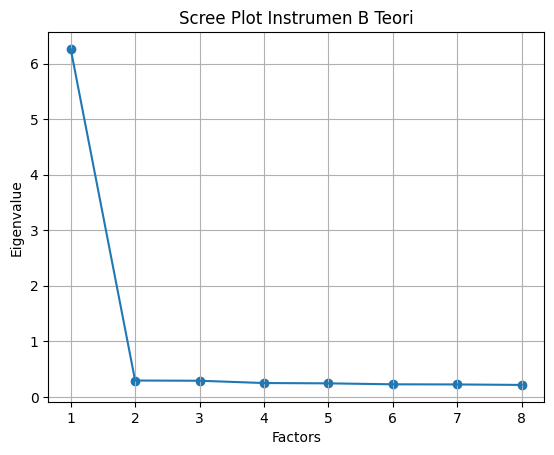

In [43]:
plt.scatter(range(1,b_teori.shape[1]+1),ev)
plt.plot(range(1,b_teori.shape[1]+1),ev)
plt.title('Scree Plot Instrumen B Teori')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [44]:
import numpy as np

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(b_teori)

factor_loadings = fa.loadings_
eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=b_teori.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1
B1  0.555651  0.678072
B2  0.526585  0.706624
B3  0.586234  0.641813
B4  0.621837  0.604536
B5  0.660601  0.560815
B6  0.717466  0.512756
B7  0.687836  0.534271
B8  0.609527  0.615759

Eigenvalues:
[6.26694518 0.2931089  0.28911111 0.24774884 0.24215859 0.22487398
 0.22225203 0.21380138]

Communalities:
[ 6.02831970e+00  6.23886084e-02  4.38849989e-02  1.13683135e-02
  9.83549559e-04 -1.07346248e-02 -1.78378758e-02 -2.76645667e-02]


In [45]:
faktor1 = []
faktor2 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    else:
        faktor2.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")

Faktor 1: ['X4', 'X5', 'X6', 'X7']
Faktor 2: ['X1', 'X2', 'X3', 'X8']


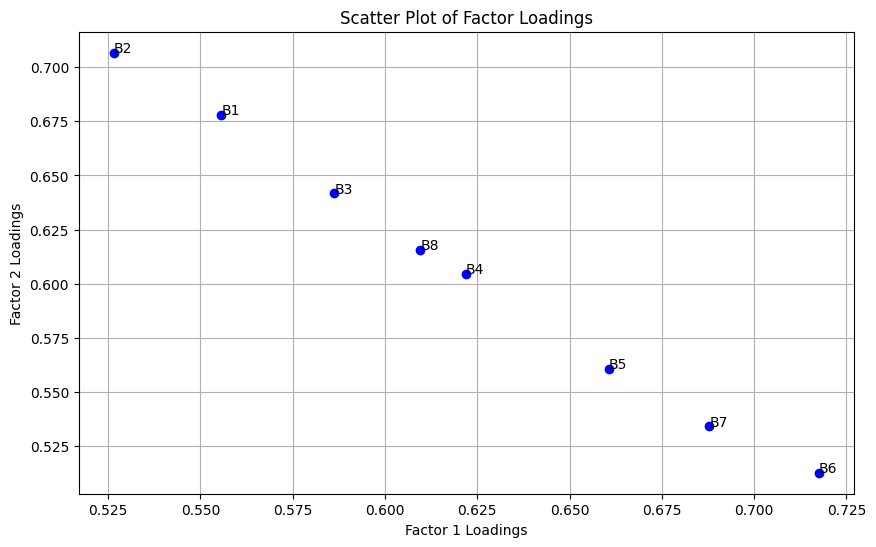

In [46]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

# Tambahkan label untuk setiap titik
for i, txt in enumerate(b_teori.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

### Intrumen B Teori 1000 Data

In [47]:
import pandas as pd
ins_b_teori = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/instrumen_b_teori_1000.csv")
ins_b_teori.head(5)

,B1,B2,B3,B4,B5,B6,B7,B8
0,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3
2,2,3,3,3,4,3,3,3
3,2,3,3,3,3,3,3,3
4,3,4,4,4,3,4,4,4


In [48]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)  
fa.fit(ins_b_teori)  

ev, v = fa.get_eigenvalues()
ev

array([6.54946858, 0.29487979, 0.22568189, 0.20898151, 0.19979623,
       0.18471817, 0.18178936, 0.15468447])

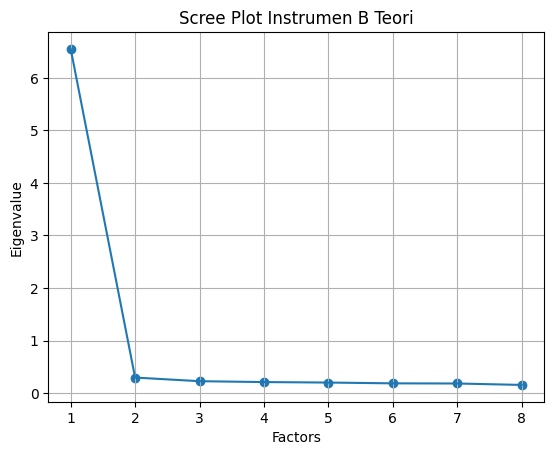

In [49]:
plt.scatter(range(1,ins_b_teori.shape[1]+1),ev)
plt.plot(range(1,ins_b_teori.shape[1]+1),ev)
plt.title('Scree Plot Instrumen B Teori')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [50]:
import numpy as np

fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(ins_b_teori)

factor_loadings = fa.loadings_
eigenvalues, communalities = fa.get_eigenvalues()

print("Factor Loadings:")
with np.printoptions(suppress = True, precision =5):
    print(pd.DataFrame(fa.loadings_, index=ins_b_teori.columns))
print("\nEigenvalues:")
print(eigenvalues)
print("\nCommunalities:")
print(communalities)

Factor Loadings:
           0         1
B1  0.752523  0.505065
B2  0.705028  0.549033
B3  0.653430  0.599778
B4  0.608905  0.657855
B5  0.539609  0.712272
B6  0.534650  0.745929
B7  0.567814  0.699997
B8  0.721599  0.531957

Eigenvalues:
[6.54946858 0.29487979 0.22568189 0.20898151 0.19979623 0.18471817
 0.18178936 0.15468447]

Communalities:
[ 6.35798739e+00  1.09001489e-01  2.73837785e-02  1.69082347e-02
  4.55847698e-03 -8.73093457e-03 -1.38602250e-02 -2.62591261e-02]


In [51]:
faktor1 = []
faktor2 = []

for i,x in enumerate(factor_loadings):
    if max(x) == x[0]:
        faktor1.append("X"+str(i+1))
    else:
        faktor2.append("X"+str(i+1))

print(f"Faktor 1: {faktor1}")
print(f"Faktor 2: {faktor2}")

Faktor 1: ['X1', 'X2', 'X3', 'X8']
Faktor 2: ['X4', 'X5', 'X6', 'X7']


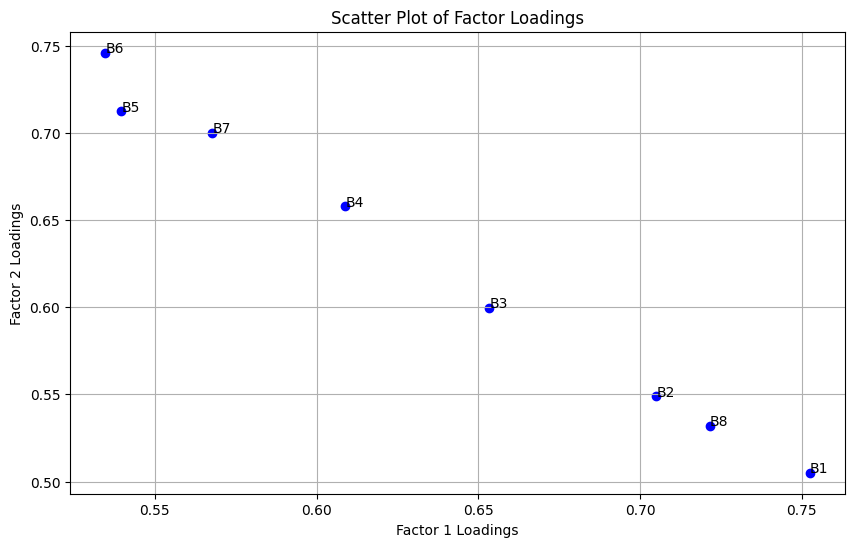

In [52]:
import matplotlib.pyplot as plt

factor_loadings = fa.loadings_

plt.figure(figsize=(10, 6))
plt.scatter(factor_loadings[:, 0], factor_loadings[:, 1], c='b', marker='o')
plt.xlabel('Factor 1 Loadings')
plt.ylabel('Factor 2 Loadings')
plt.title('Scatter Plot of Factor Loadings')
plt.grid(True)

for i, txt in enumerate(ins_b_teori.columns):
    plt.annotate(txt, (factor_loadings[i, 0], factor_loadings[i, 1]))

plt.show()

# Uji Validitas Teori

In [53]:
import pandas as pd
teori = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/teori_1000 data.csv")
teori.head(5)

,A1,A10,A2,A3,A4,A5,A6,A7,A8,A9,...,B2,B3,B4,B5,B6,B7,B8,C1,C2,C3
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,4,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,4,4,3,4,3,3,4,4,4,4,...,4,4,4,3,4,4,4,3,4,4


In [54]:
# Hitung Total Score tiap butir pertanyaan
import pandas as pd
teori['Total_Skor'] = teori.sum(axis = 1, skipna = True)
teori.head()

,A1,A10,A2,A3,A4,A5,A6,A7,A8,A9,...,B3,B4,B5,B6,B7,B8,C1,C2,C3,Total_Skor
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,63
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,63
2,3,3,3,3,3,3,3,3,3,3,...,3,3,4,3,3,3,3,3,3,63
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,62
4,4,4,3,4,3,3,4,4,4,4,...,4,4,3,4,4,4,3,4,4,78


In [55]:
print(teori.corr(method = 'pearson'))

                  A1       A10        A2        A3        A4        A5  \
A1          1.000000  0.712970  0.764746  0.690136  0.666165  0.660034   
A10         0.712970  1.000000  0.692113  0.637234  0.632128  0.629958   
A2          0.764746  0.692113  1.000000  0.767721  0.717982  0.674997   
A3          0.690136  0.637234  0.767721  1.000000  0.742059  0.700991   
A4          0.666165  0.632128  0.717982  0.742059  1.000000  0.766796   
A5          0.660034  0.629958  0.674997  0.700991  0.766796  1.000000   
A6          0.636896  0.663298  0.650672  0.655352  0.691001  0.747706   
A7          0.678776  0.643919  0.641540  0.655630  0.671029  0.680121   
A8          0.609411  0.660112  0.608142  0.607792  0.578253  0.621380   
A9          0.663057  0.678628  0.675654  0.651347  0.644156  0.646592   
B1          0.647607  0.646315  0.676221  0.646028  0.671215  0.656478   
B2          0.639483  0.684558  0.663824  0.661461  0.656620  0.651495   
B3          0.666411  0.632837  0.6810

<Axes: >

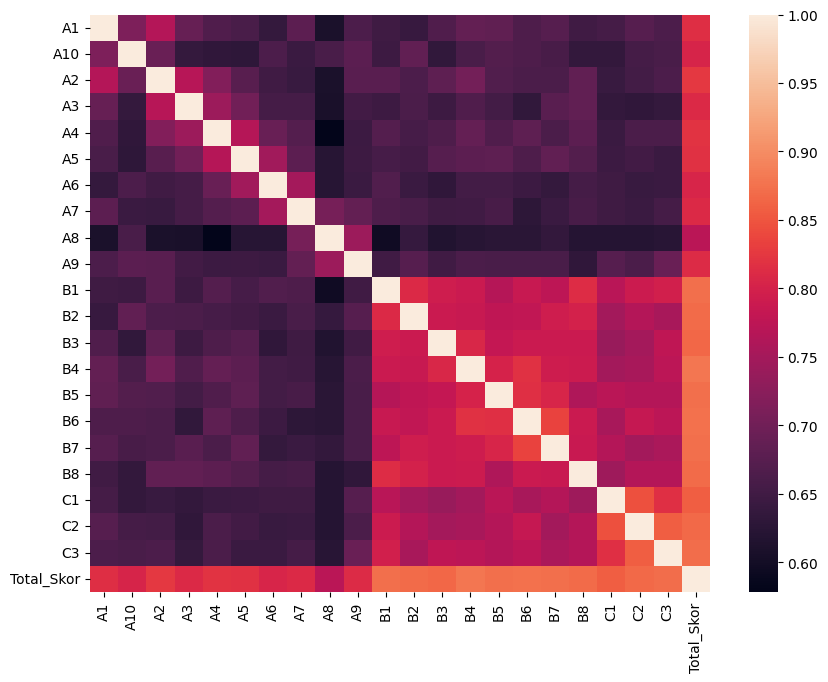

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=teori.corr()
corr_matrix
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

C:\Users\ASUS VIVOBOOK\anaconda3\envs\home\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


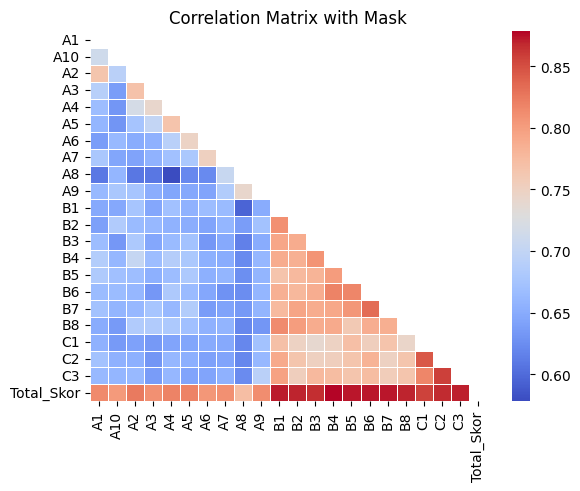

In [57]:
import numpy as np

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Matrix with Mask')
plt.show()

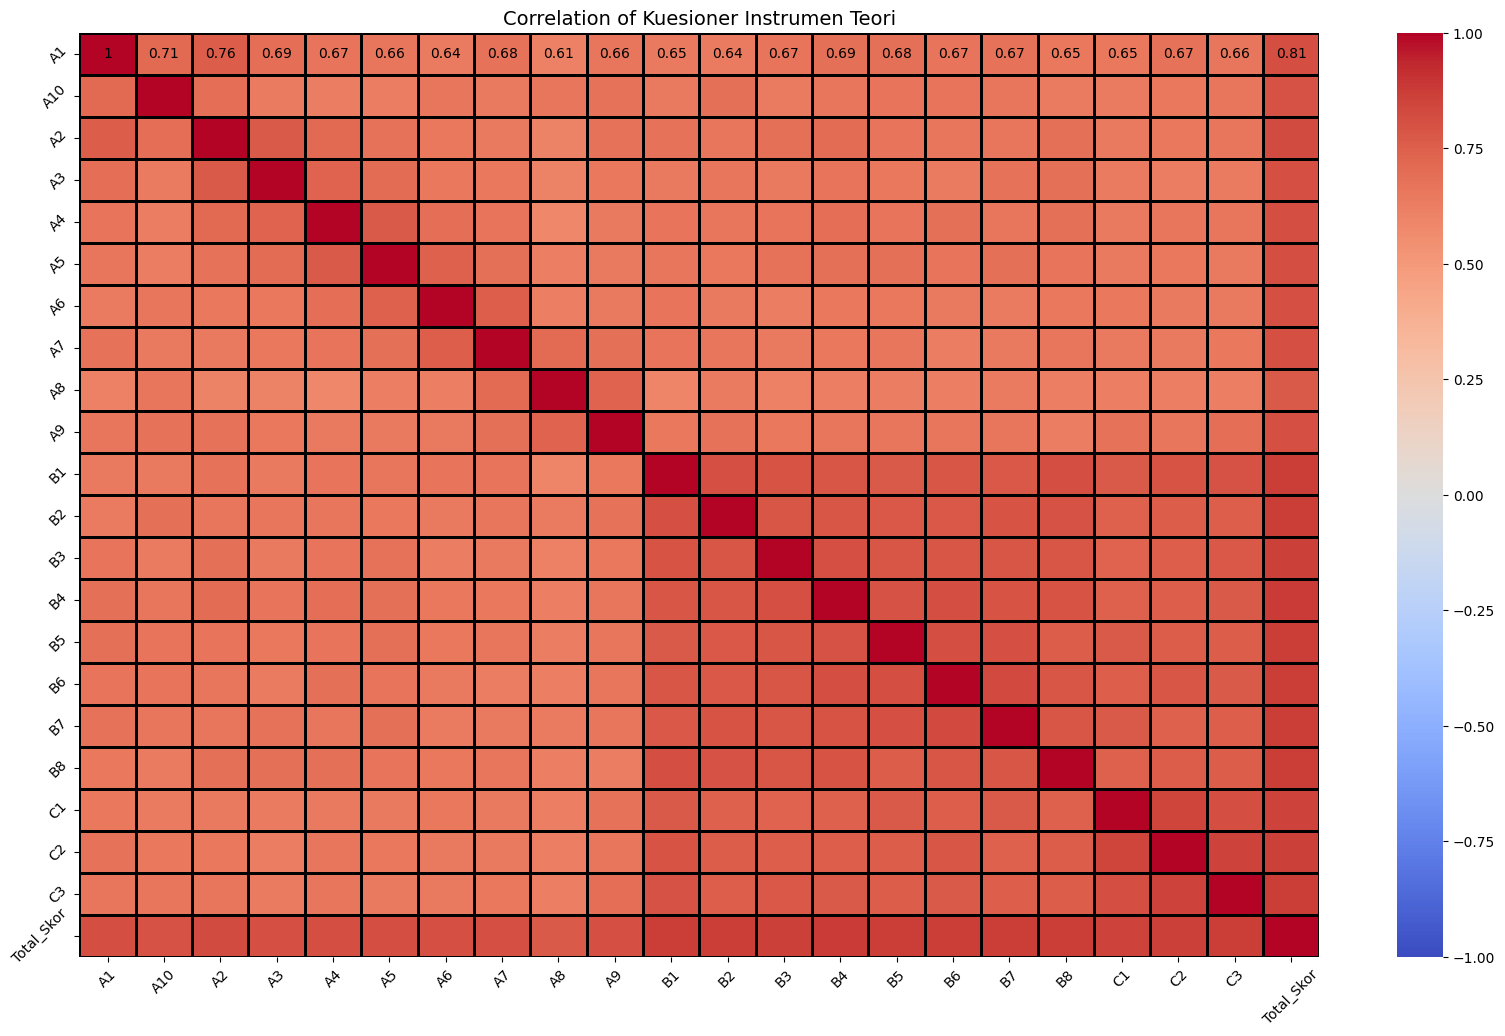

In [58]:
fig = plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':10,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title('Correlation of Kuesioner Instrumen Teori',size=14)
plt.show()

# Uji Reliabilitas Teori

In [59]:
def cronbach_alpha(teori):
    prak_corr = teori.corr()
    N = teori.shape[1]
    rs = np.array([])
    
    for i, col in enumerate(teori_corr.columns):
        sum = teori_corr[col][i+1:].values 
        rs = np.append(sum, rs)
    mean_r= np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [60]:
import pingouin as pg

In [61]:
pg.cronbach_alpha(data=teori.drop(['Total_Skor'], axis = 1))

(0.9790760088042095, array([0.977, 0.981]))

In [62]:
pg.cronbach_alpha(data=teori.drop(['Total_Skor'], axis = 1), ci=.99)

(0.9790760088042095, array([0.977, 0.981]))

# Uji validitas Praktikum

In [63]:
import pandas as pd
prak = pd.read_csv("D:/kuliah/smt-5/Workshop Analitika Data/praktikum_1000 data.csv")
prak.head(5)

,A1,A2,A3,A4,A5,A6,A7,B1,B2,B3,...,B8,C1,C2,D1,D2,D3,D4,D5,D6,D7
0,3,3,3,3,3,2,1,2,2,2,...,3,3,3,3,3,3,2,3,2,2
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,2,3,4,4,4,...,4,4,2,4,4,4,4,4,4,4


In [64]:
# Hitung Total Score tiap butir pertanyaan
import pandas as pd
prak['Total_Skor'] = prak.sum(axis = 1, skipna = True)
prak.head()

,A1,A2,A3,A4,A5,A6,A7,B1,B2,B3,...,C1,C2,D1,D2,D3,D4,D5,D6,D7,Total_Skor
0,3,3,3,3,3,2,1,2,2,2,...,3,3,3,3,3,2,3,2,2,61
1,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,96
2,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,96
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,96
4,4,4,4,4,4,2,3,4,4,4,...,4,2,4,4,4,4,4,4,4,91


In [65]:
print(prak.corr(method = 'pearson'))

                  A1        A2        A3        A4        A5        A6  \
A1          1.000000  0.691126  0.464181  0.052624  0.072042  0.157459   
A2          0.691126  1.000000  0.591536  0.031780  0.065154  0.173409   
A3          0.464181  0.591536  1.000000  0.100236  0.099845  0.212655   
A4          0.052624  0.031780  0.100236  1.000000  0.525146  0.319042   
A5          0.072042  0.065154  0.099845  0.525146  1.000000  0.234483   
A6          0.157459  0.173409  0.212655  0.319042  0.234483  1.000000   
A7          0.105826  0.119059  0.171442  0.359660  0.297512  0.527567   
B1         -0.038515 -0.012936  0.025242 -0.041322 -0.019836  0.015898   
B2         -0.022479  0.005569  0.014849 -0.042494 -0.013964  0.010941   
B3          0.008274 -0.039802  0.021899  0.000962 -0.010566  0.007570   
B4         -0.055781 -0.039825 -0.001744 -0.022438  0.012378 -0.011517   
B5         -0.000784 -0.033796 -0.020471 -0.050105 -0.060221  0.011065   
B6          0.003400 -0.009011  0.0206

<Axes: >

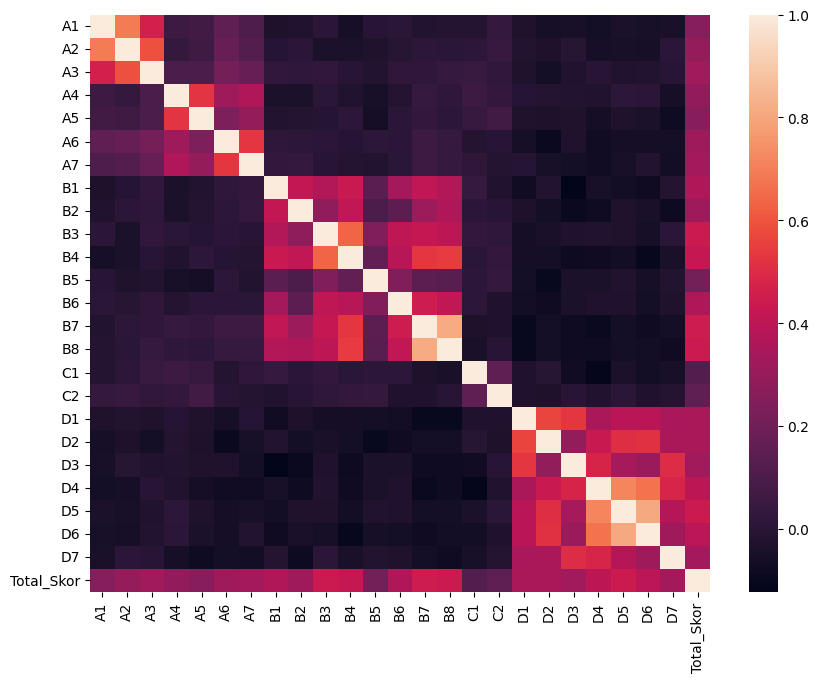

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=prak.corr()
corr_matrix
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

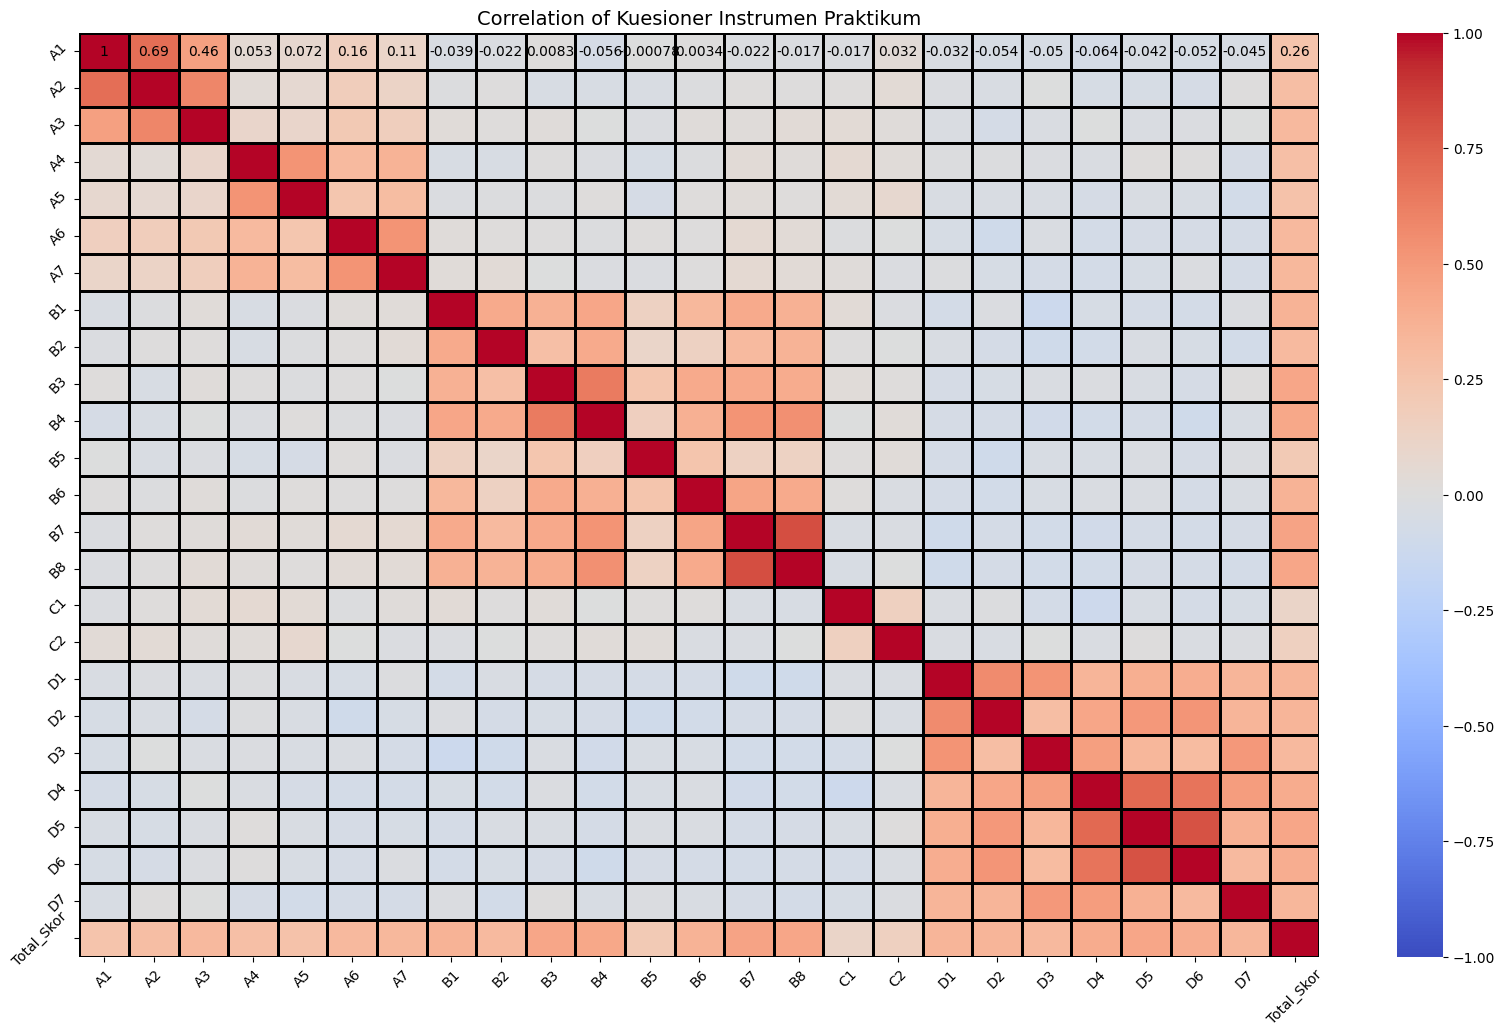

In [67]:
fig = plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':10,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title('Correlation of Kuesioner Instrumen Praktikum',size=14)
plt.show()

# Uji Reliabilitas Praktikum

In [68]:
def cronbach_alpha(prak):
    prak_corr = prak.corr()
    N = prak.shape[1]
    rs = np.array([])
    
    for i, col in enumerate(prak_corr.columns):
        sum = prak_corr[col][i+1:].values 
        rs = np.append(sum, rs)
    mean_r= np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [69]:
import pingouin as pg

In [70]:
pg.cronbach_alpha(data=prak.drop(['Total_Skor'], axis = 1))

(0.6428830218159455, array([0.61 , 0.674]))

In [71]:
pg.cronbach_alpha(data=prak.drop(['Total_Skor'], axis = 1), ci=.99)

(0.6428830218159455, array([0.599, 0.683]))